In [100]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [101]:
with open('data/train.csv') as f:
    clean_file = [line for line in map(lambda s: s.strip().replace('"', ''), f.readlines()) if line != '']

with open('data/train_clean.csv', 'w') as f:
    f.write('\n'.join(clean_file))

In [102]:
train = pd.read_csv('data/train_clean.csv')

In [103]:
train.shape

(26884, 25)

The dataset has 26884 rows and 25 columns

In [104]:
train.columns

Index(['CUST_COD', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'BIRTH_DATE',
       'PAY_DEC', 'PAY_NOV', 'PAY_OCT', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL',
       'BILL_AMT_DEC', 'BILL_AMT_NOV', 'BILL_AMT_OCT', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'PAY_AMT_DEC', 'PAY_AMT_NOV',
       'PAY_AMT_OCT', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'DEFAULT PAYMENT JAN'],
      dtype='object')

Columns:
- CUST_COD : customer code
- LIMIT_BAL : Amount of credit card given to the client
- SEX : gender
- EDUCATION : education level
- MARRIAGE : marital status
- BIRTH_DATE : birthdate
- PAY_DEC, PAY_NOV, PAY_OCT, PAY_SEP, PAY_AUG, PAY_JUL : history of payments. 1 = 1 month delay, 2 = 2 months delay...
- BILL_AMT_DEC, BILL_AMT_NOV, BILL_AMT_OCT, BILL_AMT_SEP, BILL_AMT_AUG, BILL_AMT_JUL : amount of bill statement per month
- PAY_AMT_DEC, PAY_AMT_NOV, PAY_AMT_OCT, PAY_AMT_SEP, PAY_AMT_AUG, PAY_AMT_JUL : amount of payment per month
- DEFAULT PAYMENT JAN : default payment on January 1 = yes, 0 = no

# LIMIT_BAL

In [105]:
train['LIMIT_BAL'].describe()

count    26884.00000
mean      4997.91411
std       3879.73624
min        298.13600
25%       1490.68000
50%       4173.90400
75%       7155.26400
max      29813.60000
Name: LIMIT_BAL, dtype: float64

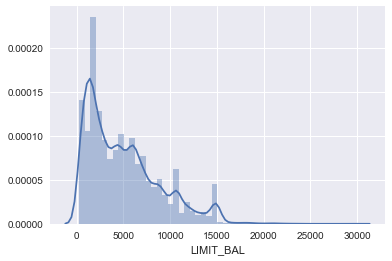

In [106]:
sns.distplot(train['LIMIT_BAL'])

In [107]:
print("Number of null values: {0}".format(train['LIMIT_BAL'].isnull().sum()))

Number of null values: 0


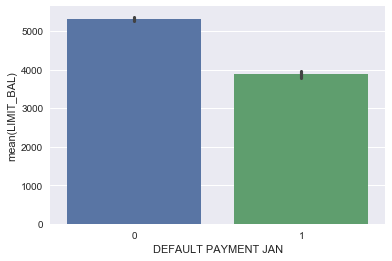

In [108]:
sns.barplot(x='DEFAULT PAYMENT JAN', y='LIMIT_BAL', data=train)

If the balance is higher, there is lower probability to default. That seems reasonable

# SEX

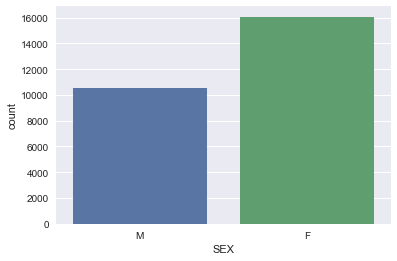

In [109]:
sns.countplot(x='SEX', data=train)

There are more females than males

In [110]:
males = (train['SEX'] == 'M').sum()
females = (train['SEX'] == 'F').sum()
sex_nulls = (train['SEX'].isnull()).sum()

print("Number of males: {0}".format(males))
print("Number of females: {0}".format(females))
print("Number of nulls: {0}".format(sex_nulls))

print("\nSum: {0} / {1}".format(males + females + sex_nulls, len(train)))

Number of males: 10555
Number of females: 16071
Number of nulls: 258

Sum: 26884 / 26884


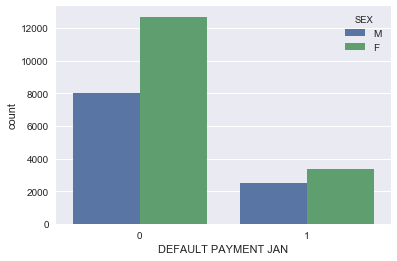

In [111]:
sns.countplot(x='DEFAULT PAYMENT JAN', hue='SEX', data=train)

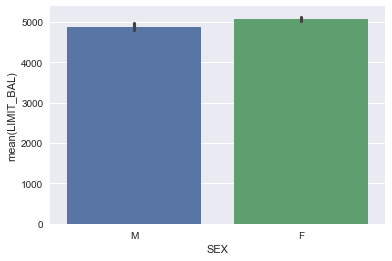

In [112]:
sns.barplot(x = 'SEX', y = 'LIMIT_BAL', data=train)

Males and females have quite the same initial balance

In [113]:
pd.crosstab(train['SEX'], train['DEFAULT PAYMENT JAN'], normalize=0)

DEFAULT PAYMENT JAN,0,1
SEX,,
F,0.790119,0.209881
M,0.761440,0.238560


Females have ~21% probability to default, while males have a slightly higher probability to default (~24%)

# EDUCATION

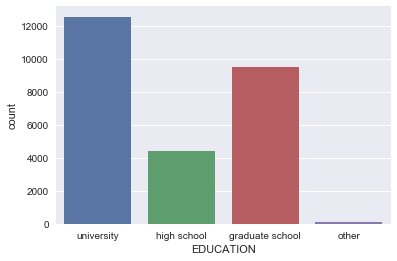

In [114]:
sns.countplot(x='EDUCATION', data=train)

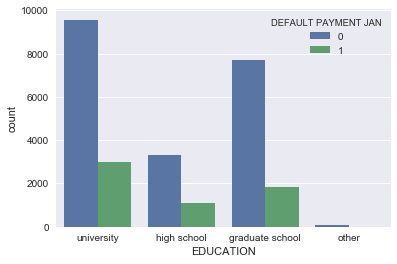

In [115]:
sns.countplot(x = 'EDUCATION', hue='DEFAULT PAYMENT JAN', data=train)

In [124]:
pd.crosstab(train['EDUCATION'], train['DEFAULT PAYMENT JAN'], normalize=0)

DEFAULT PAYMENT JAN,0,1
EDUCATION,,
graduate school,0.808036,0.191964
high school,0.749546,0.250454
other,0.936937,0.063063
university,0.762057,0.237943


In [123]:
pd.crosstab(train['EDUCATION'], train['DEFAULT PAYMENT JAN'])

DEFAULT PAYMENT JAN,0,1
EDUCATION,,
graduate school,7682,1825
high school,3304,1104
other,104,7
university,9560,2985


There is no high correlation between having an education and go in default. Those with 'other' education may be outliers.

Note in fact that the baseline is 80% - 20%

In [126]:
print ("Num of missing values: {0}".format((train['EDUCATION'].isnull()).sum()))

Num of missing values: 313


Ugh there are some missing values...

# MARRIAGE

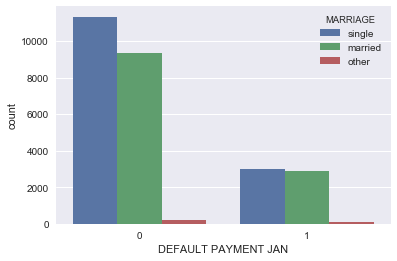

In [137]:
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'MARRIAGE', data=train)

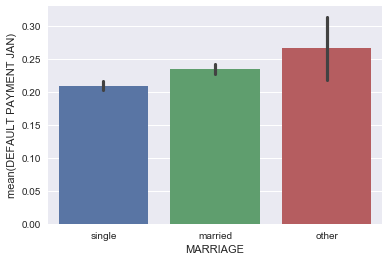

In [144]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'MARRIAGE', data=train)

Singles have slightly higher probability of not being insolvent than married ones.

In [141]:
print("Number of missing values: {0}".format(train['MARRIAGE'].isnull().sum()))

Number of missing values: 50


# BIRTHDATE

Instead of bithdate consider the age (in years)

In [194]:
birthdates = train['BIRTH_DATE']

In [195]:
print("Number of missing values: {0}".format(birthdates.isnull().sum()))

Number of missing values: 702


In [196]:
import datetime
def get_age(date):
    try:
        return (datetime.datetime.today() - datetime.datetime.strptime(date, '%d/%m/%Y')).days//365
    except Exception as e:
        return date

birthdates = birthdates.apply(get_age)

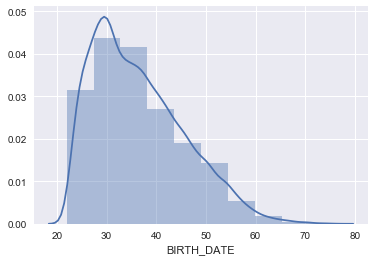

In [213]:
sns.distplot(birthdates[~birthdates.isnull()], bins=10)

In [214]:
train['AGE'] = birthdates

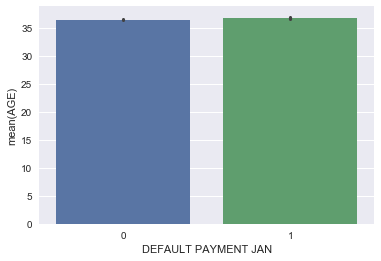

In [219]:
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'AGE', data=train)

There is no significant difference of age between insolvents and non insolvents

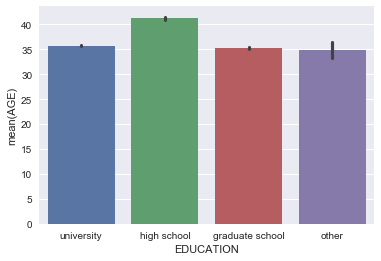

In [220]:
sns.barplot(x = 'EDUCATION', y = 'AGE', data=train)

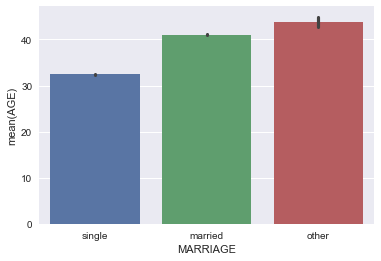

In [221]:
sns.barplot(x = 'MARRIAGE', y = 'AGE', data=train)

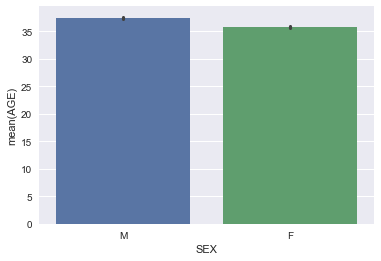

In [222]:
sns.barplot(x = 'SEX', y = 'AGE', data=train)

# PAY_*

In [249]:
def aggregate_payment(x):
    return x['PAY_DEC'] + x['PAY_OCT'] + x['PAY_NOV'] + x['PAY_AUG'] + x['PAY_SEP'] + x['PAY_JUL']

def aggregate_payment_normalized(x):
    cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
    ret = 0
    for c in cols:
        if x[c] > 0:
            ret += 1
        elif x[c] < 0:
            ret -= 1
    return ret
            
train['PAY_SUM'] = train.apply(aggregate_payment, axis=1)
train['PAY_SUM_NORM'] = train.apply(aggregate_payment_normalized, axis=1)

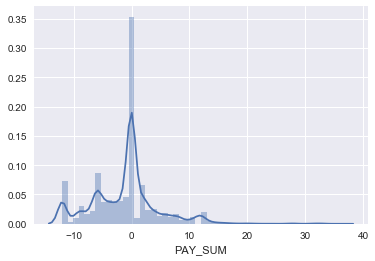

In [250]:
sns.distplot(train['PAY_SUM'])

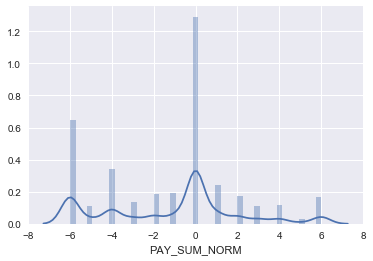

In [251]:
sns.distplot(train['PAY_SUM_NORM'])

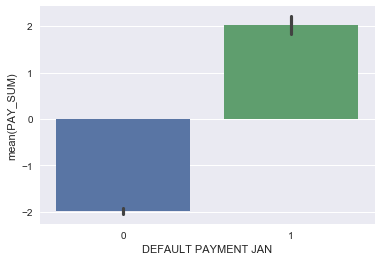

In [252]:
sns.barplot(y='PAY_SUM', x='DEFAULT PAYMENT JAN', data=train)

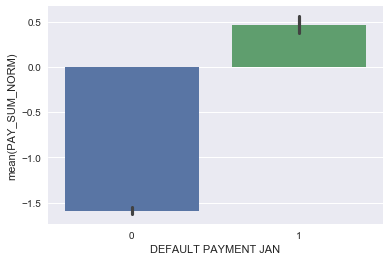

In [253]:
sns.barplot(y='PAY_SUM_NORM', x='DEFAULT PAYMENT JAN', data=train)

In [254]:
def predict_default(pay_sum):
    if pay_sum > 0:
        return 1
    return 0

prediction = train['PAY_SUM'].apply(predict_default)
prediction_norm = train['PAY_SUM_NORM'].apply(predict_default)

In [255]:
from sklearn.metrics import accuracy_score
pay_sum_acc = accuracy_score(prediction, train['DEFAULT PAYMENT JAN'])
pay_sum_acc_norm = accuracy_score(prediction_norm, train['DEFAULT PAYMENT JAN'])

print ("Accuracy for sum: {0}\nAccuracy for sum normalized: {1}".format(pay_sum_acc, pay_sum_acc_norm))

Accuracy for sum: 0.772132123195953
Accuracy for sum normalized: 0.7759262014581163


In [256]:
def has_paid_most_times(x):
    if x == 0:
        return 'PAY REGULAR'
    if x > 0:
        return 'PAY LATE'
    if x < 0:
        return 'PAY EARLY'

train['PAYER_TYPE'] = train['PAY_SUM_NORM'].apply(has_paid_most_times)

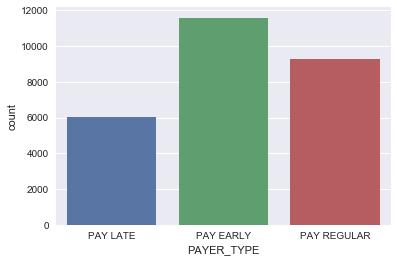

In [258]:
sns.countplot(x = 'PAYER_TYPE', data = train)

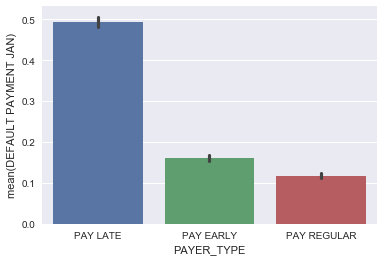

In [263]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'PAYER_TYPE', data = train)

It is reasonable that the ones that have paid late most of the times has a higher chance of becoming insolvent in January

**TODO** Try to give some weights, since the payments in Dec and Nov are more meaningful than the ones in Jul. Maybe check the first derivative of the series.